In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
%config IPCompleter.greedy=True

In [4]:
df = pd.read_csv('~/Master Thesis/Data/iris.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [6]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [7]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
df_3d=pca.transform(df)

In [9]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

**Significance level of Dimention after PCA**

In [10]:
print(pca.explained_variance_ratio_)

[0.92264045 0.04810411 0.01829962]


In [11]:
sample = df_3d.tolist()

In [12]:
sample

[[-2.865506694179958, 0.30278044218553374, 0.048489721083217086],
 [-2.893213389873787, -0.1769871462954613, -0.1687981822398551],
 [-3.055749096836028, -0.16800628887325064, 0.056542414873649915],
 [-2.921249021305701, -0.325027211241508, 0.009800108102126281],
 [-2.9067514031274233, 0.30233272361440966, 0.1537203023359443],
 [-2.488999876224114, 0.7397271868671302, 0.20067923958637474],
 [-2.9910653468314603, -0.11673983401330118, 0.2503858210508844],
 [-2.811052907716941, 0.15563581438173663, 0.01662684891974331],
 [-3.0524803155815983, -0.5896875831557237, -0.009287332400670034],
 [-2.8547014770343715, -0.1116332941872416, -0.1649558575723123],
 [-2.7008567941281805, 0.6362988400049816, 0.023453589737360614],
 [-2.7978438302013893, 0.008043468006814547, 0.08999455800899708],
 [-2.9603402687059757, -0.2390253328621202, -0.16705986051968497],
 [-3.3675721647873043, -0.553686578694897, 0.09819630254772632],
 [-2.830799547741352, 1.1465907493216045, 0.07491863437912921],
 [-2.587967152

**Elbow Implimentation with distance measure as Euclidean**

In [13]:
distortion_euclidean=[]
slope=[]
K = range(1,10)
for k in K :
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit_predict(sample)
    #Calculate pairwise distance between centers and each sample and then finding minnimum of that
    distortion_euclidean.append(sum(np.min(cdist(sample,kmeansModel.cluster_centers_,'euclidean'),axis=1)))
    #Calculate slope of each line
    if k>1:
        s= (distortion_euclidean[-1]-distortion_euclidean[-2])
        slope.append([k,s])

**Ploting Elbow**

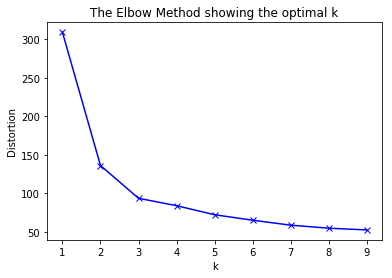

In [14]:
plt.plot(K,distortion_euclidean,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
slope

[[2, -172.66230305922298],
 [3, -42.484011741316706],
 [4, -9.591827157750217],
 [5, -11.727602531064363],
 [6, -7.091057977367427],
 [7, -6.424184893798042],
 [8, -3.9348072791926825],
 [9, -2.2090961601683503]]

In [16]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3


**Elbow Implimentation with distance measure as Cosine**

In [16]:
distortion_euclidean=[]
slope=[]
K = range(1,10)
for k in K :
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit_predict(sample)
    #Calculate pairwise distance between centers and each sample and then finding minnimum of that
    distortion_euclidean.append(sum(np.min(cdist(sample,kmeansModel.cluster_centers_,'cosine'),axis=1)))
    #Calculate slope of each line
    if k>1:
        s= (distortion_euclidean[-1]-distortion_euclidean[-2])
        slope.append([k,s])

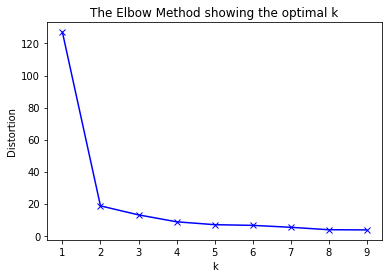

In [17]:
plt.plot(K,distortion_euclidean,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
slope

[[2, -108.38636844814474],
 [3, -5.6118313758622325],
 [4, -4.322437501636953],
 [5, -1.805381366568974],
 [6, -0.42678072643679954],
 [7, -1.2014034233275668],
 [8, -1.5180265477264179],
 [9, -0.12250821592543026]]

In [19]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 5
Optimal Number of Clusters = 6


**Elbow Implimentation with kmeans score()**  
*i.e Sum of distances of samples to their closest cluster center*

In [20]:
kmeans_score=[]
slope1=[]
sse=[]
K = range(1,10)
for k in K :
    kmeansModel1 = KMeans(n_clusters=k)
    labels=kmeansModel1.fit_predict(sample)
    centers = kmeansModel1.cluster_centers_
    #print(len(centers))
    #print(kmeansModel1.labels_)
    kmeans_score.append(kmeansModel1.score(sample))
    #print(kmeans_score)
    #sample_transformed = kmeansModel1.transform(sample)
    #print(sample_transformed)
    #Calculate slope of each line
    if k>1:
        s= (kmeans_score[-2]-kmeans_score[-1])
        slope1.append([k,s])

[[2.88186673]
 [2.9035325 ]
 [3.06088642]
 [2.93929151]
 [2.92647206]
 [2.60434039]
 [3.00379646]
 [2.81540715]
 [3.10893129]
 [2.86164165]
 [2.77489706]
 [2.79930238]
 [2.97466916]
 [3.41419883]
 [3.05511198]
 [2.92773097]
 [2.92684576]
 [2.84867219]
 [2.57184193]
 [2.83028969]
 [2.55770733]
 [2.77562729]
 [3.38378593]
 [2.51128081]
 [2.55819815]
 [2.7136027 ]
 [2.6682678 ]
 [2.7757371 ]
 [2.84106012]
 [2.82256308]
 [2.78292953]
 [2.64419878]
 [2.95458483]
 [2.99541282]
 [2.86164165]
 [3.03653784]
 [2.87494466]
 [2.86164165]
 [3.18241966]
 [2.7868272 ]
 [2.95858047]
 [3.17871582]
 [3.18376595]
 [2.62102075]
 [2.47377088]
 [2.9051022 ]
 [2.77958189]
 [3.02043903]
 [2.79335241]
 [2.88505957]
 [1.51048317]
 [0.96288705]
 [1.57627115]
 [0.85663746]
 [1.12035698]
 [0.71355167]
 [1.08469388]
 [1.25105523]
 [1.14551093]
 [0.72496641]
 [1.38538112]
 [0.48203733]
 [0.89592952]
 [0.95648057]
 [0.32004132]
 [1.08266989]
 [0.69222471]
 [0.49385096]
 [1.18370024]
 [0.62838738]
 [1.05659866]
 [0.42

[[5.50241512 0.13647051 4.12349874 3.0975187 ]
 [5.55488859 0.41760659 4.13233351 3.02758973]
 [5.70856365 0.41182206 4.29702205 3.19446508]
 [5.58959621 0.50850339 4.16741138 3.04418281]
 [5.5430495  0.18591856 4.16962968 3.14444405]
 [5.1478036  0.67611008 3.82749465 2.91304932]
 [5.64111118 0.38995407 4.24332909 3.15341145]
 [5.44943239 0.03892678 4.05707201 3.00668465]
 [5.75370045 0.79783107 4.32110585 3.16825097]
 [5.5115344  0.35706476 4.09274739 2.99770448]
 [5.35121428 0.48052925 4.00484736 3.04954254]
 [5.44003787 0.17169712 4.04080766 2.96778055]
 [5.62679818 0.48436425 4.20129911 3.08777215]
 [6.05889586 0.90827144 4.63365534 3.48771602]
 [5.53836611 0.97432082 4.25276968 3.39349291]
 [5.33472801 1.21283337 4.10071494 3.30873867]
 [5.47131843 0.64249718 4.1526415  3.22462986]
 [5.4681758  0.13045266 4.09110732 3.06587378]
 [5.09178755 0.82588352 3.77788749 2.89801725]
 [5.41768806 0.38499052 4.06919549 3.08696131]
 [5.16563761 0.45634165 3.78772624 2.79481181]
 [5.37310685 

[[0.26328544 3.1700323  4.560808   ... 0.53791852 5.21035689 2.57696887]
 [0.76153182 3.11902253 4.54044248 ... 0.16904321 5.25291876 2.38639668]
 [0.76106621 3.28871841 4.68468235 ... 0.13775957 5.39883357 2.54468263]
 ...
 [4.74865299 1.88735249 0.69394616 ... 4.97384746 0.33207001 2.89520746]
 [4.91485195 2.16960366 0.91163972 ... 5.15411788 0.48507178 3.1188679 ]
 [4.47603803 1.57348551 0.24857752 ... 4.64045557 0.82042482 2.4823216 ]]
[[4.560808   0.26328544 3.1700323  ... 3.79024566 3.98767574 5.23603793]
 [4.54044248 0.76153182 3.11902253 ... 3.78916573 4.04684993 5.27948805]
 [4.68468235 0.76106621 3.28871841 ... 3.96563103 4.22286348 5.42709499]
 ...
 [0.69394616 4.74865299 1.88735249 ... 1.26244879 1.21342406 0.36379778]
 [0.91163972 4.91485195 2.16960366 ... 1.63980493 1.59671509 0.53361227]
 [0.24857752 4.47603803 1.57348551 ... 1.14578072 1.3292212  0.86703079]]


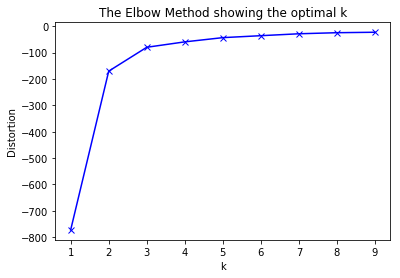

In [21]:
plt.plot(K,kmeans_score,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
slope1

[[2, -601.6255550152939],
 [3, -90.49619004187277],
 [4, -20.48547838148584],
 [5, -16.02371377970554],
 [6, -7.383931071836301],
 [7, -7.26050287203639],
 [8, -4.044411103499307],
 [9, -1.7452535780643892]]

In [23]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope1[a])[-1] - (slope1[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope1[a][0])-1))

Optimal Number of Clusters = 1
Optimal Number of Clusters = 2
Optimal Number of Clusters = 3
Optimal Number of Clusters = 4
Optimal Number of Clusters = 5
Optimal Number of Clusters = 6
Optimal Number of Clusters = 7
